In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
 #sklearn preproc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
data_index=pd.read_csv('../data/out_csv/index_Australia.csv')

In [ ]:
data_index.head()

In [ ]:
data_index=data_index.set_index('date')

In [ ]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

In [ ]:
data_index=data_index.fillna(0)

In [ ]:
data_index.head()

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index[:925],np.log(data_index['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

In [ ]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [ ]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

## scaling data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
len(X)

# Train test splitting

In [ ]:
n = len(X)
X_train = X[0:int(n-50)]
X_test=X[int(n-50):]
y_train=y[0:int(n-50)]
y_test=y[int(n-50):]

# Model

In [17]:
model =SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='scale', kernel='poly')

In [47]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


KeyboardInterrupt: 

## fitting the model for train and test set

In [ ]:
model.fit(X_train,y_train)

## prediction

In [39]:
y_pred=model.predict(X_test)

## evaluating model performance

In [40]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.06683729183913777

In [22]:
y_pred.shape

(191,)

Text(0.5, 0, 'Date')

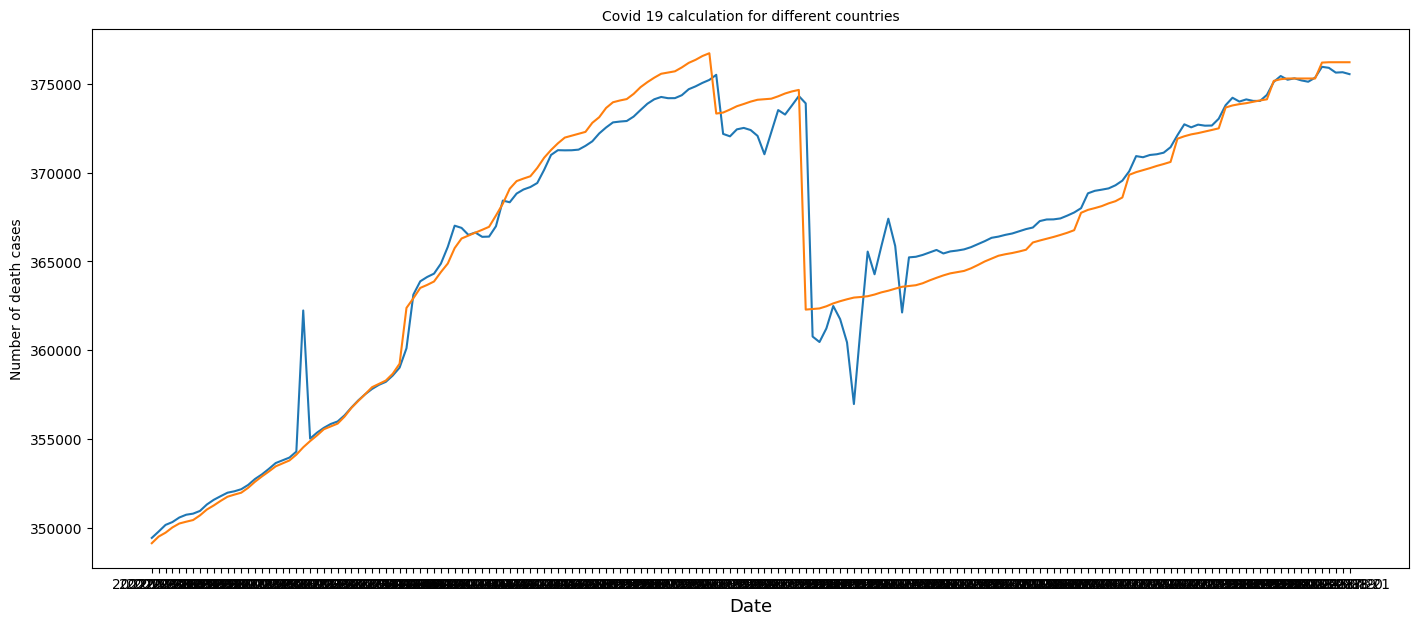

In [52]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:175],y_pred[:175]);
plt.plot(y_test.index[:175],y_test[:175]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)